# Exploratory Data Analysis

In this notebook, EDA will be performed on the resale flat prices in Singapore to better understand the dataset

## Import required libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [42]:
raw_data = pd.read_csv('raw_flat_prices_data.csv', parse_dates= ['month', 'lease_commence_date'])

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                287196 non-null  datetime64[ns]
 1   town                 287196 non-null  object        
 2   flat_type            287196 non-null  object        
 3   block                287196 non-null  object        
 4   street_name          287196 non-null  object        
 5   storey_range         287196 non-null  object        
 6   floor_area_sqm       287196 non-null  float64       
 7   flat_model           287196 non-null  object        
 8   lease_commence_date  287196 non-null  datetime64[ns]
 9   resale_price         287196 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 21.9+ MB


In [43]:
raw_data.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200


In [44]:
raw_data.isnull().values.any()

False

## Analysis on the month column

In [45]:
df_month = raw_data[['month', 'resale_price']]
df_month = df_month.copy(deep= True)

df_month

,month,resale_price
0,1990-01-01,9000
1,1990-01-01,6000
2,1990-01-01,8000
3,1990-01-01,6000
4,1990-01-01,47200
...,...,...
287191,1999-12-01,456000
287192,1999-12-01,408000
287193,1999-12-01,469000
287194,1999-12-01,440000


In [46]:
# Generate 2 features: Year of transanction and the quarter of the year in which it is transacted

df_month['year_of_transaction'] = df_month['month'].dt.year
df_month['quarter'] = df_month['month'].dt.quarter

df_month

,month,resale_price,year_of_transaction,quarter
0,1990-01-01,9000,1990,1
1,1990-01-01,6000,1990,1
2,1990-01-01,8000,1990,1
3,1990-01-01,6000,1990,1
4,1990-01-01,47200,1990,1
...,...,...,...,...
287191,1999-12-01,456000,1999,4
287192,1999-12-01,408000,1999,4
287193,1999-12-01,469000,1999,4
287194,1999-12-01,440000,1999,4


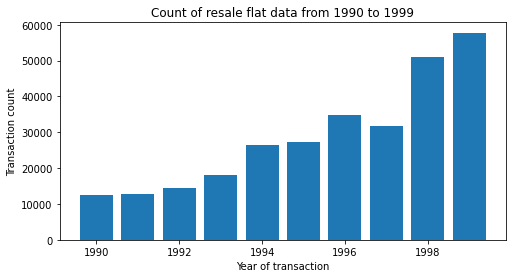

In [47]:
# Show the distribution of data count over the years

data_counts_by_year = df_month.groupby(['year_of_transaction'])['year_of_transaction'].count()

plt.figure(figsize= (8, 4))
plt.bar(data_counts_by_year.index, data_counts_by_year.values)
plt.xlabel('Year of transaction')
plt.ylabel('Transaction count')
plt.title('Count of resale flat data from 1990 to 1999')
plt.show()

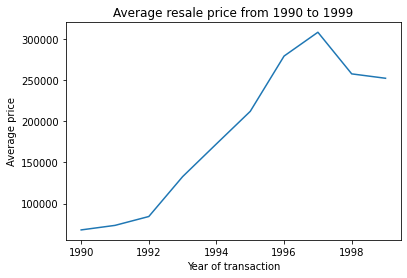

In [48]:
# Show average prices over the years

avg_prices_by_year = df_month.groupby(['year_of_transaction'])['resale_price'].mean()

plt.plot(avg_prices_by_year.index, avg_prices_by_year.values)
plt.xlabel('Year of transaction')
plt.ylabel('Average price')
plt.title('Average resale price from 1990 to 1999')
plt.show()

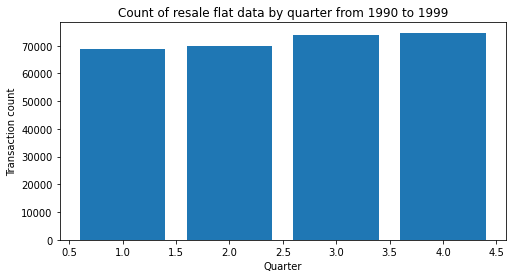

In [49]:
# Show distribution of data count over the quarters

data_counts_by_quarter = df_month.groupby(['quarter'])['quarter'].count()

plt.figure(figsize= (8, 4))
plt.bar(data_counts_by_quarter.index, data_counts_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Transaction count')
plt.title('Count of resale flat data by quarter from 1990 to 1999')
plt.show()

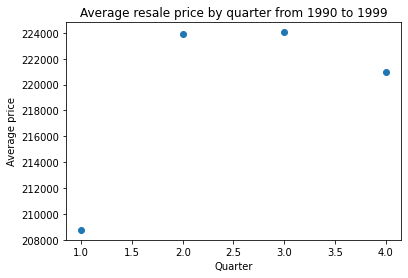

In [50]:
# Show average prices by quarter

avg_prices_by_quarter = df_month.groupby(['quarter'])['resale_price'].mean()

plt.scatter(avg_prices_by_quarter.index, avg_prices_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Average price')
plt.title('Average resale price by quarter from 1990 to 1999')
plt.show()

## Conclusions for month column

* There are more data collected over the years 
* Prices of resale flats increased over the years
* Relatively equal number of data collected per quarter
* Average price by quarter is relatively similar (about < 10% difference)

## Analysis on the Town column

In [51]:
df_town = raw_data[['town', 'resale_price']]
df_town = df_town.copy(deep= True)

df_town

,town,resale_price
0,ANG MO KIO,9000
1,ANG MO KIO,6000
2,ANG MO KIO,8000
3,ANG MO KIO,6000
4,ANG MO KIO,47200
...,...,...
287191,YISHUN,456000
287192,YISHUN,408000
287193,YISHUN,469000
287194,YISHUN,440000


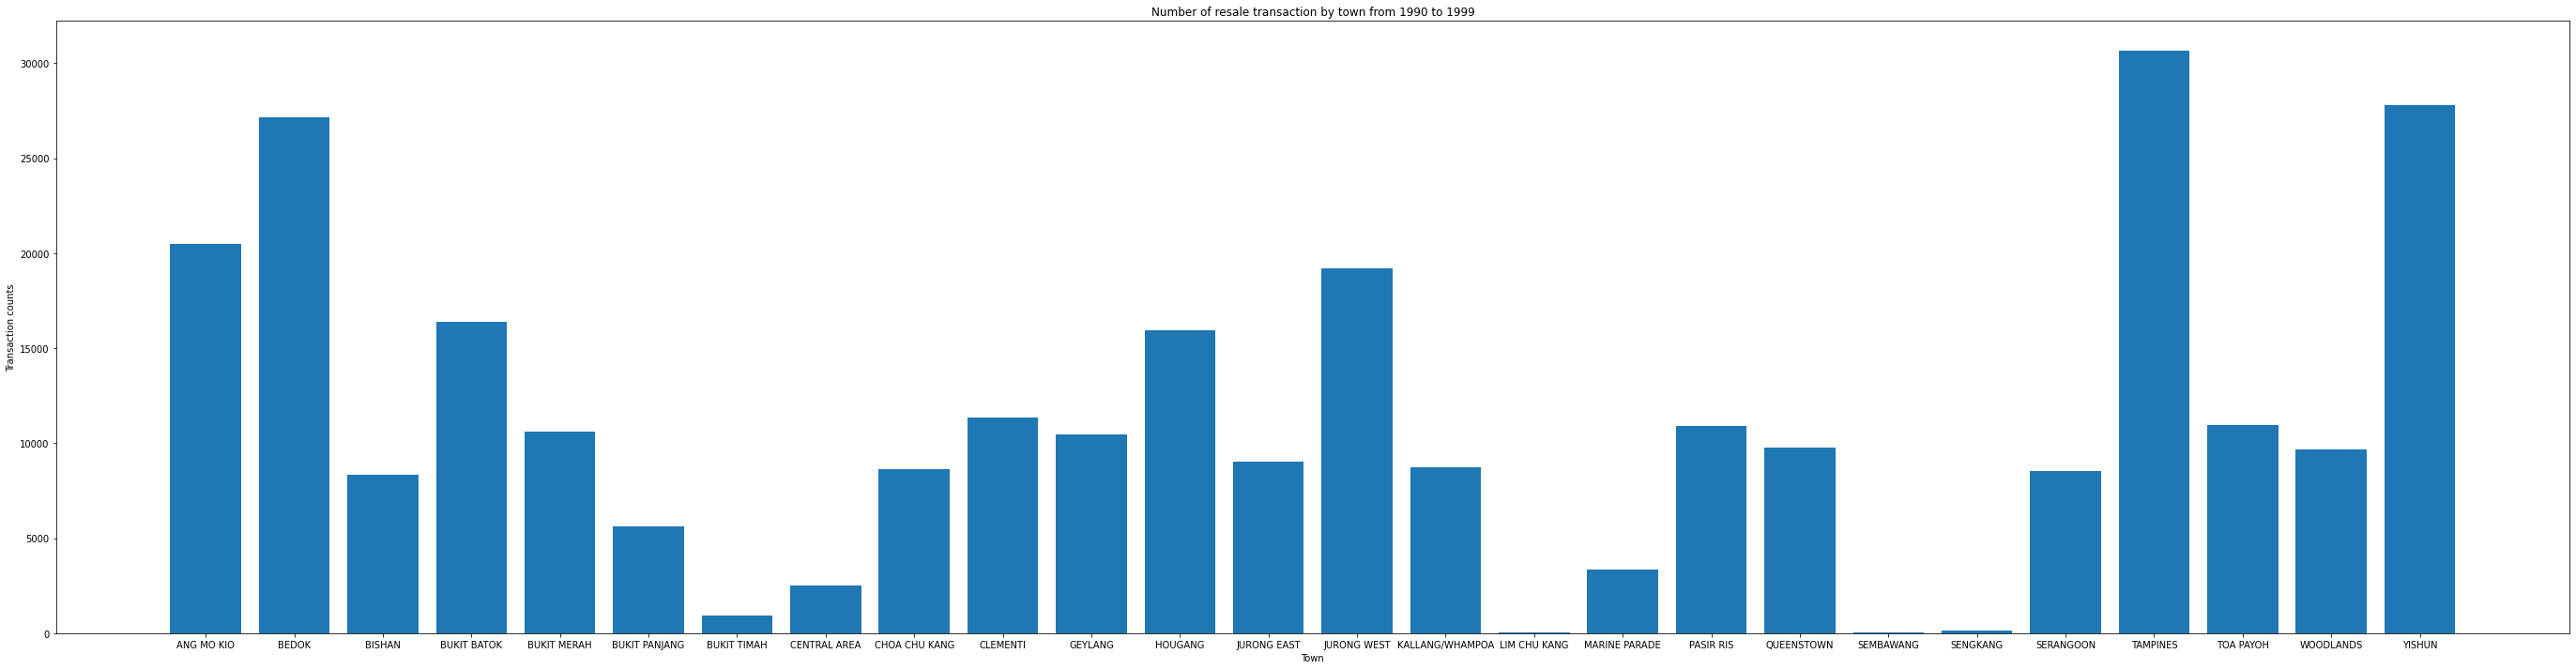

In [52]:
# Show distribution of data counts by town

data_counts_by_town = df_town.groupby(['town'])['town'].count()

plt.figure(figsize= (48, 12))
plt.bar(data_counts_by_town.index, data_counts_by_town.values)
plt.xlabel('Town')
plt.ylabel('Transaction counts')
plt.title('Number of resale transaction by town from 1990 to 1999')
plt.show()

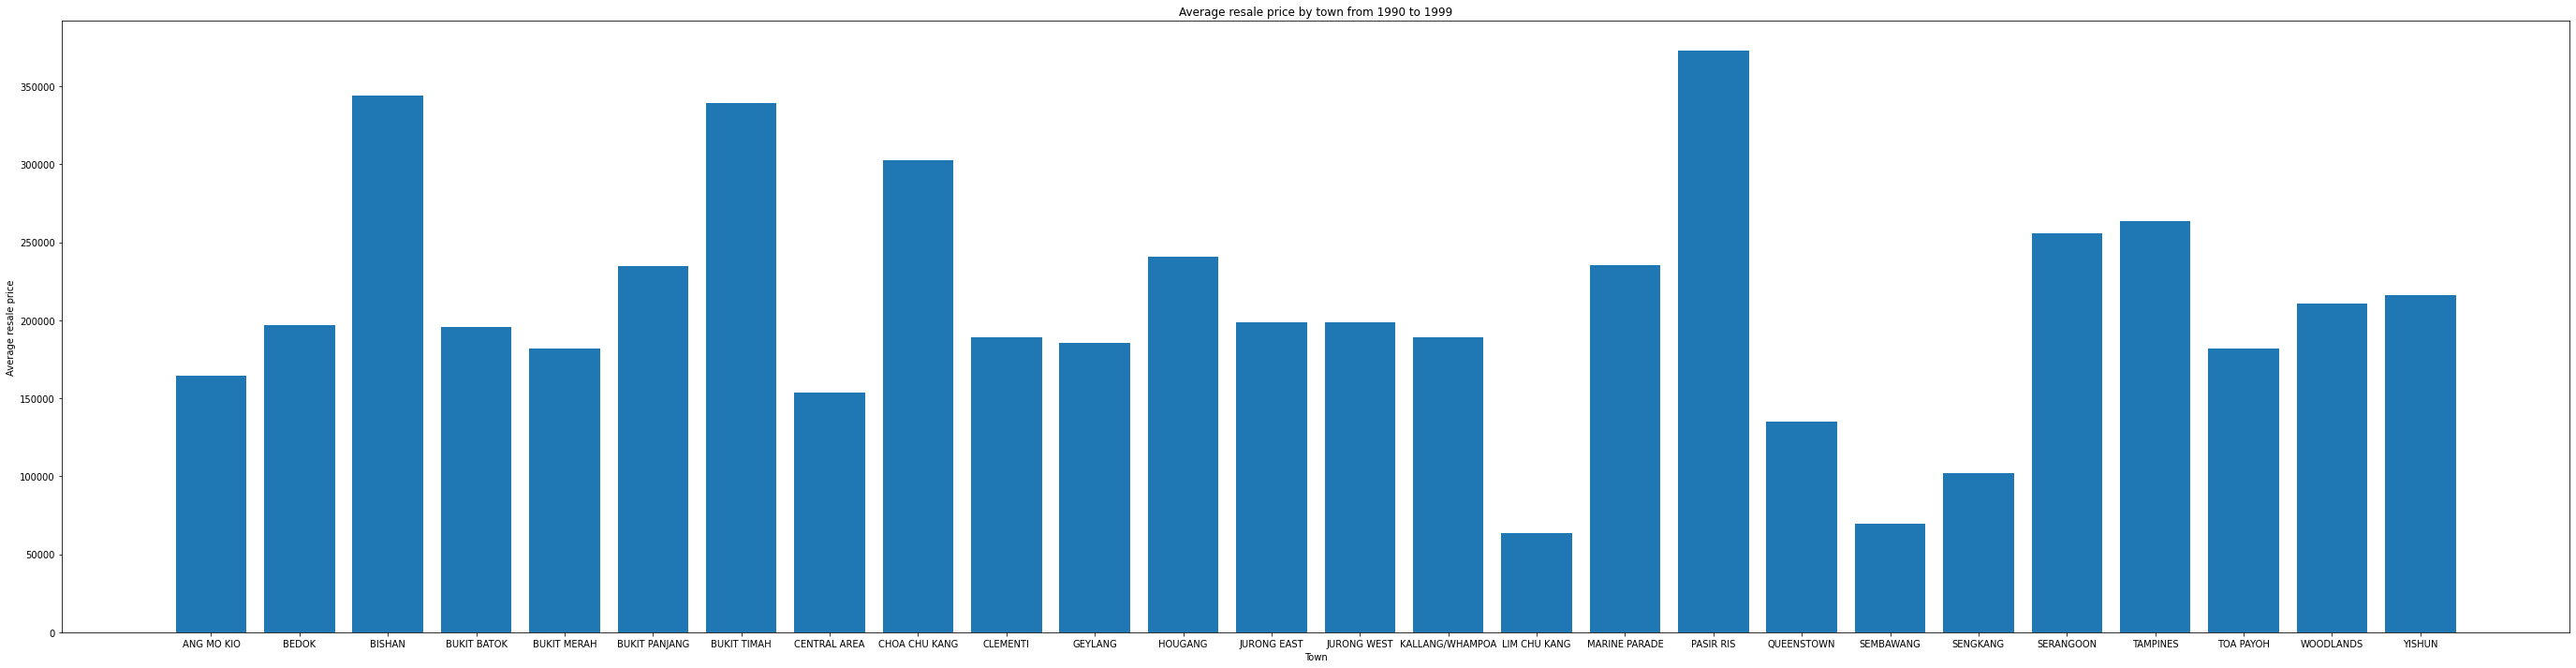

In [53]:
# Show price distribution by town

avg_prices_by_town = df_town.groupby(['town'])['resale_price'].mean()

plt.figure(figsize= (48, 12))
plt.bar(avg_prices_by_town.index, avg_prices_by_town.values)
plt.xlabel('Town')
plt.ylabel('Average resale price')
plt.title('Average resale price by town from 1990 to 1999')
plt.show()

In [54]:
regions = {
    'ANG MO KIO': 'North-East',
    'BEDOK': 'East',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'BUKIT MERAH': 'Central',
    'BUKIT PANJANG': 'West',
    'BUKIT TIMAH': 'Central',
    'CENTRAL AREA': 'Central',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'GEYLANG': 'Central',
    'HOUGANG': 'North-East',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'KALLANG/WHAMPOA': 'Central',
    'LIM CHU KANG': 'North',
    'MARINE PARADE': 'Central',
    'PASIR RIS': 'East',
    'QUEENSTOWN': 'Central',
    'SEMBAWANG': 'North',
    'SENGKANG': 'North-East',
    'SERANGOON': 'North-East',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'WOODLANDS': 'North',
    'YISHUN': 'North'
}


In [55]:
region_series = []

for t in df_town['town']:
    region_series.append(regions[t])

print(len(region_series))

287196


In [56]:
df_town['region'] = region_series

df_town

,town,resale_price,region
0,ANG MO KIO,9000,North-East
1,ANG MO KIO,6000,North-East
2,ANG MO KIO,8000,North-East
3,ANG MO KIO,6000,North-East
4,ANG MO KIO,47200,North-East
...,...,...,...
287191,YISHUN,456000,North
287192,YISHUN,408000,North
287193,YISHUN,469000,North
287194,YISHUN,440000,North


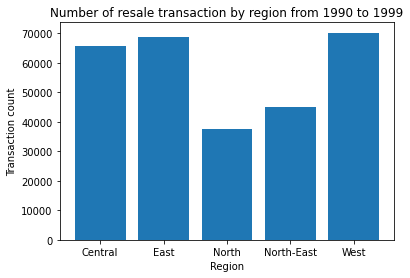

In [57]:
# Show distribution of data counts by region

data_counts_by_region = df_town.groupby(['region'])['region'].count()

plt.bar(data_counts_by_region.index, data_counts_by_region.values)
plt.xlabel('Region')
plt.ylabel('Transaction count')
plt.title('Number of resale transaction by region from 1990 to 1999')
plt.show()

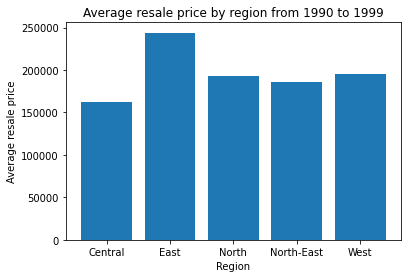

In [58]:
# Show price distribution by region

avg_prices_by_region = df_town.groupby(['region'])['resale_price'].median()

plt.bar(avg_prices_by_region.index, avg_prices_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average resale price')
plt.title('Average resale price by region from 1990 to 1999')
plt.show()

## Conclusions from town column

* Some of the towns have significantly lower data points (E.g. Bukit Timah, Lim Chu Kang, Sembawang, Sengkang)
* There is large variance in average resale price across the different towns
* In attempts to make the data more robust, grouping data by regions makes each region more equally represented 
* However, this removes the variance as the average resale price becomes relatively similar

## Analysis on flat type column

In [61]:
df_flattype = raw_data[['flat_type', 'resale_price']].copy(deep= True)

df_flattype

,flat_type,resale_price
0,1 ROOM,9000
1,1 ROOM,6000
2,1 ROOM,8000
3,1 ROOM,6000
4,3 ROOM,47200
...,...,...
287191,EXECUTIVE,456000
287192,EXECUTIVE,408000
287193,EXECUTIVE,469000
287194,EXECUTIVE,440000


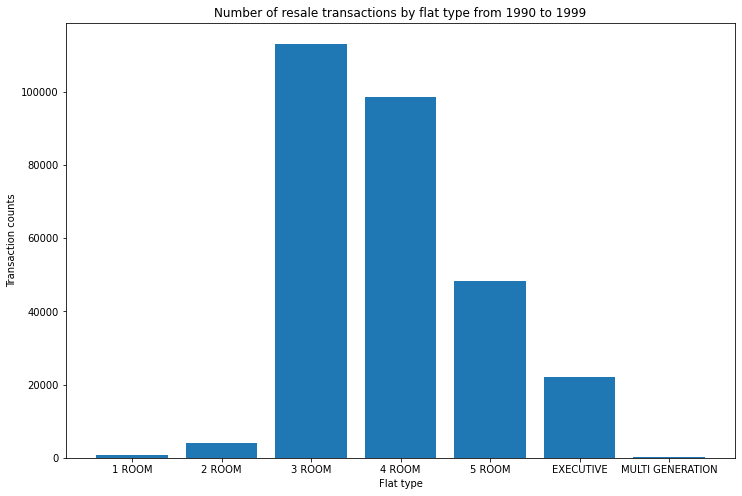

In [66]:
data_counts_by_flattype = df_flattype.groupby(['flat_type'])['flat_type'].count()

plt.figure(figsize=(12, 8))
plt.bar(data_counts_by_flattype.index, data_counts_by_flattype.values)
plt.xlabel('Flat type')
plt.ylabel('Transaction counts')
plt.title('Number of resale transactions by flat type from 1990 to 1999')
plt.show()

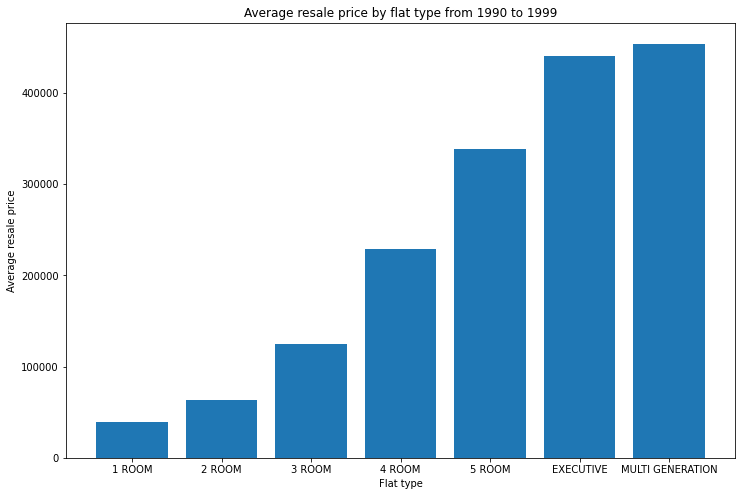

In [68]:
avg_prices_by_flattype = df_flattype.groupby(['flat_type'])['resale_price'].mean()

plt.figure(figsize= (12, 8))
plt.bar(avg_prices_by_flattype.index, avg_prices_by_flattype.values)
plt.xlabel('Flat type')
plt.ylabel('Average resale price')
plt.title('Average resale price by flat type from 1990 to 1999')
plt.show()

## Conclusions for flat type column

* Significantly less data point for 1-room, 2-room and multigeneration flat types - this could lead to lower accuracy in predictions for these flat types
* There is large variance in average resale price across different flat types